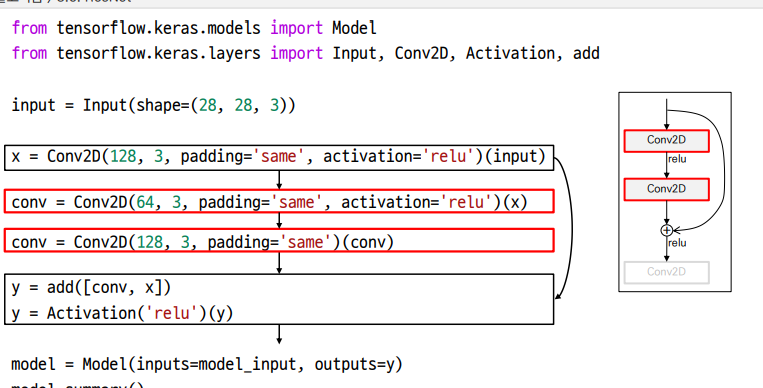

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, add

input = Input(shape=(28,28,3))

x = Conv2D(128, 3, padding='same', activation='relu')(input)
conv = Conv2D(64, 3, padding='same',activation='relu')(x)
conv = Conv2D(128, 3, padding='same')(conv)

y = add([conv, x])
y = Activation('relu')(y)

model = Model(inputs=input, outputs=y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 128)          3584      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 28, 28, 64)           73792     ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 28, 28, 128)          73856     ['conv2d_1[0][0]']            
                                                                                              

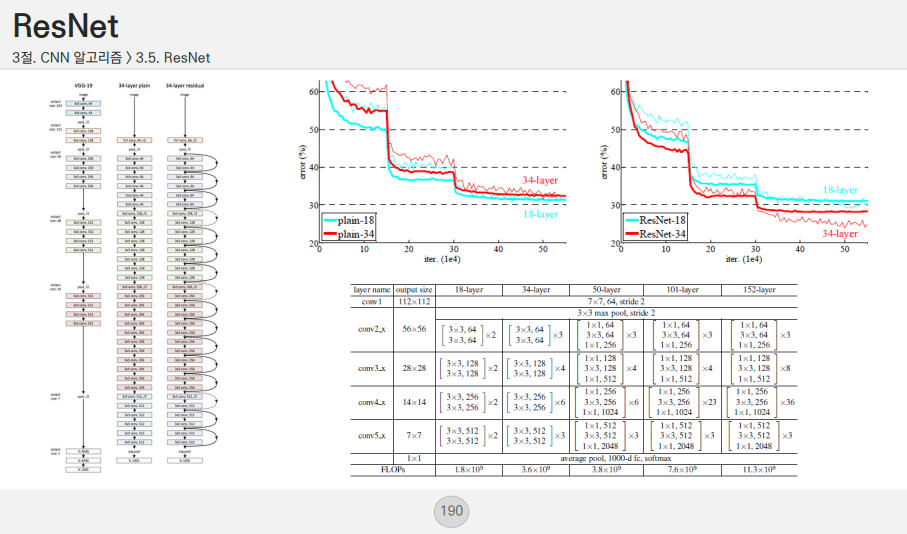

In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling2D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

NUM_CLASSES = 10

(train_X, train_y), (test_X, test_y) = cifar10.load_data()
print("train_X shape:", train_X.shape)
print(test_X.shape[0], "test samples")

input_shape = train_X.shape[1:]

train_X = train_X / 255.0
test_X = test_X / 255.0

inputs = Input(shape=input_shape)

conv = Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")

x = conv(inputs)
x = BatchNormalization()(x)

conv = Conv2D(filters=32, kernel_size=3, padding="same",
              activation="relu", kernel_regularizer=l2(1e-4))

y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters=32, kernel_size=3, padding="same",
              kernel_regularizer=l2(1e-4))

y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x,y])
x = Activation("relu")(x)

conv = Conv2D(filters=32, kernel_size=3, padding="same",
              activation="relu", kernel_regularizer=l2(1e-4))

y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters=32, kernel_size=3, padding="same",
              kernel_regularizer=l2(1e-4))

y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x,y])
x = Activation("relu")(x)

x = AveragePooling2D(pool_size=8)(x)
y = Flatten()(x)

y = Dense(512, activation="relu")(y)
outputs = Dense(NUM_CLASSES, activation="softmax")(y)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

train_X shape: (50000, 32, 32, 3)
10000 test samples
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 32, 32, 32)           896       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 32)           128       ['conv2d_3[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 conv2d_4 (Conv2D)           (None, 32,

In [4]:
import os

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler

EPOCHS = 100
BATCH_SIZE = 200

save_dir = os.path.join(os.getcwd(), "saved_models")
model_name = "cifar10_model-{epoch:03d}-{val_accuracy:.4f}.h5"

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor="val_accuracy",
                             save_best_only=True, verbose=1)

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 90:
        lr *= 0.5e-3
    elif epoch > 80:
        lr *= 1e-3
    elif epoch > 60:
        lr *= 1e-2
    elif epoch > 40:
        lr *= 1e-1
    print("Learning rate:", lr)
    return lr

lr_schedule = LearningRateScheduler(lr_schedule)

my_callbacks = [checkpoint, lr_schedule]

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

history = model.fit(train_X, train_y,
                    validation_data=(test_X, test_y),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    callbacks=my_callbacks)

Learning rate: 0.001
Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 1.3468 - accuracy: 0.5204
Epoch 1: val_accuracy improved from -inf to 0.14930, saving model to C:\Users\KOSA\CNN\saved_models\cifar10_model-001-0.1493.h5
250/250 [==============================] - 122s 480ms/step - loss: 1.3468 - accuracy: 0.5204 - val_loss: 3.0522 - val_accuracy: 0.1493 - lr: 0.0010
Learning rate: 0.001
Epoch 2/100


C:\Users\KOSA\AppData\Local\anaconda3\envs\tf2.14\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - ETA: 0s - loss: 0.9504 - accuracy: 0.6707
Epoch 2: val_accuracy improved from 0.14930 to 0.45620, saving model to C:\Users\KOSA\CNN\saved_models\cifar10_model-002-0.4562.h5
250/250 [==============================] - 121s 484ms/step - loss: 0.9504 - accuracy: 0.6707 - val_loss: 1.5979 - val_accuracy: 0.4562 - lr: 0.0010
Learning rate: 0.001
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.8141 - accuracy: 0.7198
Epoch 3: val_accuracy improved from 0.45620 to 0.69580, saving model to C:\Users\KOSA\CNN\saved_models\cifar10_model-003-0.6958.h5
250/250 [==============================] - 122s 488ms/step - loss: 0.8141 - accuracy: 0.7198 - val_loss: 0.8889 - val_accuracy: 0.6958 - lr: 0.0010
Learning rate: 0.001
Epoch 4/100
250/250 [==============================] - ETA: 0s - loss: 0.7193 - accuracy: 0.7542
Epoch 4: val_accuracy improved from 0.69580 to 0.69690, saving model to C:\Users\KOSA\CNN\saved_models\cifar10_model-004-

In [ ]:
scores = model.evaluate(test_X, test_y, verbose=1)
print("Test loss:", scores[0])
print("test accuracy:", scores[1])

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# Accuracy 시각화
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()
# Loss 시각화
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()